In [1]:
import Ouzo_Graph_Tools as ouzo_graphs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import numpy as np
from scipy import interpolate, stats

In [12]:
def extract_plates(path, sheet_list):
    """Will return a sublist of plates absorbance information in dataframe format
    Must ensure that excel sheet has only the samples made in the csv plan as will cause errors downstream."""
    plate_dfs = []
    for sheet_name in sheet_list:
        plate_df = pd.read_excel(path, sheet_name = sheet_name).T
        plate_dfs.append(plate_df)
    return plate_dfs

In [13]:
def merge_wavelength_dfs(df_list):
    merge_list = []
    for i, df in enumerate(df_list):
        if i == 0:
            df = df
        else: 
            df = df.drop(['Wavelength'])
        merge_list.append(df)
    return pd.concat(merge_list)

In [14]:
def baseline_correction(df_samples, baseline_series): 
    """Given the series iloc of a the blank, subtracts the value at every wavelength of blank at resp. wavelength. 
    Simple subtraction blanking."""
    new_df_con = []
    for key, row in df_samples.iterrows():
        if key == 'Wavelength':
            wavelengths = row
            new_df_con.append(wavelengths)
        else: 
            series = row
            corrected = series.subtract(baseline_series)
            new_df_con.append(corrected)
    
    baseline_corrected_df = pd.concat(new_df_con, axis = 1).T
    baseline_corrected_df.index = df_samples[0].index
    return baseline_corrected_df

In [15]:
def add_abs_to_sample_info(sample_info_df, abs_df):
    
    wavelengths = list(abs_df.loc['Wavelength'])
    wavelengths_names = [str(wavelength)+'nm' for wavelength in wavelengths]
    abs_df.columns = wavelengths_names
    
    
    sample_info_df.reset_index(drop=True, inplace=True)
    abs_df.reset_index(drop=True, inplace=True)
    combined_df = pd.concat([sample_info, abs_df], axis = 1)
    return combined_df

In [31]:
def remove_visual_outliers(x, y, z, z_score_threshold = 3):
    """This is not a to remove statistical outliers, only to remove values which present. Outliers will be 
    removed based on the data of z and subsequently from x and y given the same indexes of entries. Inputs must be nparrays"""

    z_array = np.asarray(z)
    z_scores = np.abs(stats.zscore(np.asarray(z)))
    threshold = z_score_threshold
    index_to_remove = np.where(z_scores > threshold)[0] # must be in ascending order
    
    x = x.copy()
    y = y.copy()
    z = z.copy()
    
    for index in reversed(index_to_remove): # reveresed to perserve index
        del x[index]
        del y[index]
        del z[index]
    
    xyz_array = [x,y,z]
    return xyz_array


In [32]:
# what happens with overflow or undefined data???

In [33]:
# Load all things needed in this case
sample_info = pd.read_csv(r"C:\Users\Edwin\Desktop\Ouzo Runs\11_17_2020\experiment_info") # make it find the blank position from sample_info
plate_names = ['Sheet1','Sheet2', 'Sheet3']
plate_dfs = extract_plates(r"C:\Users\Edwin\Desktop\Ouzo Runs\11_17_2020\11_17_2020_Plate123.xlsx", plate_names) # can edit/remove wells accidently measured etc, but really should be done at excel level
merged_df = merge_wavelength_dfs(plate_dfs)
sample_info

,UID,Component 1 wtf,Component 2 wtf,Component 3 wtf,Component 4 wtf,Component 5 wtf,Slot,Labware,Well
0,UID,dppc wtf,dspe-peg wtf,PFH wtf,ethanol wtf,water wtf,Slot,Labware,Well
1,2020-11-23_ethanol_PFH_A1,0.0003,0.000125,0.0002512820512820513,0.41704545454545455,0.5822782634032634,2,Corning 96 Well Plate 360 µL Flat,A1
2,2020-11-23_ethanol_PFH_A2,0.0003,0.000125,0.0002512820512820513,0.43863636363636366,0.5606873543123543,2,Corning 96 Well Plate 360 µL Flat,A2
3,2020-11-23_ethanol_PFH_A3,0.0003,0.000125,0.0002512820512820513,0.4602272727272727,0.5390964452214453,2,Corning 96 Well Plate 360 µL Flat,A3
4,2020-11-23_ethanol_PFH_A4,0.0003,0.000125,0.0002512820512820513,0.4818181818181818,0.5175055361305361,2,Corning 96 Well Plate 360 µL Flat,A4
5,2020-11-23_ethanol_PFH_A5,0.0003,0.000125,0.0002512820512820513,0.5034090909090909,0.4959146270396271,2,Corning 96 Well Plate 360 µL Flat,A5
6,2020-11-23_ethanol_PFH_A6,0.0003,0.000125,0.0002512820512820513,0.525,0.47432371794871797,2,Corning 96 Well Plate 360 µL Flat,A6
7,2020-11-23_ethanol_PFH_A7,0.0003,0.000125,0.0002512820512820513,0.5465909090909091,0.45273280885780887,2,Corning 96 Well Plate 360 µL Flat,A7
8,2020-11-23_ethanol_PFH_A8,0.0003,0.000125,0.0002512820512820513,0.5681818181818182,0.43114189976689976,2,Corning 96 Well Plate 360 µL Flat,A8
9,2020-11-23_ethanol_PFH_A9,0.0003,0.000125,0.0002512820512820513,0.5897727272727273,0.40955099067599066,2,Corning 96 Well Plate 360 µL Flat,A9


In [34]:
# baseline and combine
baseline_series = merged_df.iloc[-1]
merged_baselined_df = baseline_correction(merged_df, baseline_series)
combined_df = add_abs_to_sample_info(sample_info, merged_df)

In [64]:
# extract data by dict method of df calling series
wavelength = '400.0nm'
x_name = combined_df['Component 4 wtf'][0]
y_name = combined_df['Component 3 wtf'][0]
x = [float(i) for i in combined_df['Component 4 wtf'][1:].tolist()][:-1] #ethanol, 
y = [float(i) for i in combined_df['Component 3 wtf'][1:].tolist()][:-1] # pfh
z = [float(i) for i in combined_df[wavelength][1:].tolist()][:-1]
combined_restricted_xyz = [x,y,z]
modi = remove_visual_outliers(x,y,z,2) # this should only be used to find the new vmin and vmax but not to excludex

In [65]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

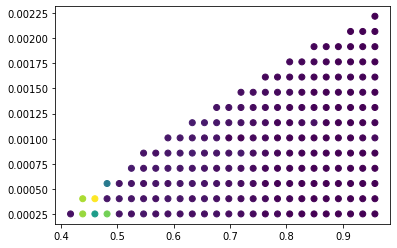

In [66]:
plt.scatter(x,y,c=z)

C:\Users\Edwin\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.30448151e-04, -2.44922909e+00,  2.34840167e-04]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 62, 'nit': 16, 'warnflag': 2}
  ConvergenceWarning)
C:\Users\Edwin\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.17914581e-04, -2.44922449e+00, -6.08517971e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 103, 'nit': 14, 'warnflag': 2}
  ConvergenceWarning)
C:\Users\Edwin\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.0063343 , -2.44836752,  0.01132647]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 67, 'nit': 11, 'warnflag': 2}
  ConvergenceWarning)
C:\Users\Edwin\Anaconda3

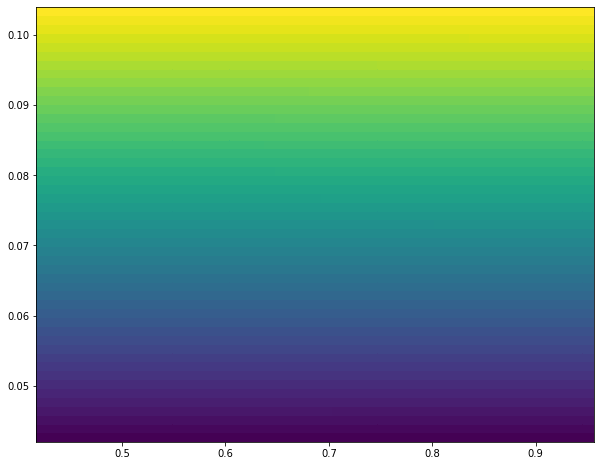

In [57]:
x_y = [[x_i, y_i] for x_i,y_i in zip(x,y)]
X = np.asarray(x_y)

y = np.asarray(z)

# Input space,
x1 = np.linspace(X[:,0].min(), X[:,0].max()) #p
x2 = np.linspace(X[:,1].min(), X[:,1].max()) #q
kernel = C(1.0, (1e-3, 1e3)) * RBF([5,5], (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)

gp.fit(X, y)


# this right here is like a mesh in itself just casting a wide prediction net which is all really a mesh is!
x1x2 = np.array(list(product(x1, x2)))
y_pred, MSE = gp.predict(x1x2, return_std=True) 


## this is the surface part???
X0p, X1p = x1x2[:,0].reshape(50,50), x1x2[:,1].reshape(50,50)
Zp = np.reshape(y_pred,(50,50))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.pcolormesh(X0p, X1p, Zp)

plt.show()